In [1]:
## Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Project - Real Estate/dataprocessing_2.csv')

In [5]:
df.head(3)

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,450.0,6666.0,Carpet area: 450 (41.81 sq.m.),2,1,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99...",12,North,Undefined,NaN,"2bhk affordable, ready to shift in sec 99a lax...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment4 out of 5', 'Lifestyle3 out of 5...",O66187314
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,1617.0,8100.0,Super Built up area 1617(150.22 sq.m.),2,2,3+,study room,"Sector 88A Gurgaon, Gurgaon, Haryana",3,North-West,Relatively New,"['JMS Crosswalk', ""Saint Paul's School"", 'Indu...",This lovely 2 bhk apartment/flat in sector 88a...,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",NaN,S69145532
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 54,independent,3.75,160.0,234375.0,Plot area 160(14.86 sq.m.),4,4,3,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",3,East,Moderately Old,"['Sector 53-54 metro station', 'Sector 54 chow...",East facing old house ready to move in f block...,"['6 Fan', '1 Exhaust Fan', '3 Geyser', '7 Ligh...","['Maintenance Staff', 'Water Storage', 'Waste ...","['Environment4 out of 5', 'Safety4 out of 5', ...",B59842588


In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1356,1.00,1137.0,Plot area 120(100.34 sq.m.)Built Up area: 120 ...
2261,1.84,2408.0,Super Built up area 2408(223.71 sq.m.)Carpet a...
969,1.25,1895.0,Super Built up area 1743(161.93 sq.m.)
418,1.67,1590.0,Carpet area: 1671 (155.24 sq.m.)
3348,2.05,2278.0,Super Built up area 2215(205.78 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
432,0.95,flat,1465.0,Super Built up area 1465(136.1 sq.m.)Built Up ...,1465.0,1175.97,834.96
2832,0.61,flat,1261.0,Super Built up area 1261(117.15 sq.m.),1261.0,NaN,NaN
3693,4.45,flat,4200.0,Super Built up area 4200(390.19 sq.m.)Built Up...,4200.0,3850.00,3600.00
1517,0.85,house,1000.0,Built Up area: 1000 (92.9 sq.m.),NaN,1000.00,NaN
2114,0.97,flat,1790.0,Super Built up area 1790(166.3 sq.m.),1790.0,NaN,NaN


In [12]:
df.duplicated().sum()

0

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,3.75,house,160.0,Plot area 160(14.86 sq.m.),NaN,NaN,NaN
19,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
21,0.42,house,50.0,Plot area 50(4.65 sq.m.),NaN,NaN,NaN
24,1.20,house,538.0,Plot area 50,NaN,NaN,NaN
28,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_name             0
property_type             0
link                      0
sector                    0
society                   0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   9
floorNum                  0
facing                 1086
agePossession             0
nearbyLocations         173
description               0
furnishDetails          974
features                622
rating                  337
property_id               0
super_built_up_area    1851
built_up_area          2589
carpet_area            1826
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,3.75,house,160.0,Plot area 160(14.86 sq.m.),NaN,NaN,NaN
19,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
21,0.42,house,50.0,Plot area 50(4.65 sq.m.),NaN,NaN,NaN
24,1.20,house,538.0,Plot area 50,NaN,NaN,NaN
28,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,3.75,house,160.0,Plot area 160(14.86 sq.m.),NaN,160.00,NaN
19,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
21,0.42,house,50.0,Plot area 50(4.65 sq.m.),NaN,50.00,NaN
24,1.20,house,538.0,Plot area 50,NaN,50.00,NaN
28,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.00,NaN
40,1.70,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
46,6.60,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
51,10.00,house,4500.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
53,5.50,house,2520.0,Plot area 280(234.12 sq.m.),NaN,280.00,NaN
71,13.50,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,3.75,house,160.0,Plot area 160(14.86 sq.m.),NaN,160.00,NaN
19,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN
21,0.42,house,50.0,Plot area 50(4.65 sq.m.),NaN,50.00,NaN
24,1.20,house,538.0,Plot area 50,NaN,535.00,NaN
28,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,1836.00,NaN
40,1.70,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
46,6.60,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
51,10.00,house,4500.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
53,5.50,house,2520.0,Plot area 280(234.12 sq.m.),NaN,2520.00,NaN
71,13.50,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_name             0
property_type             0
link                      0
sector                    0
society                   0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   9
floorNum                  0
facing                 1086
agePossession             0
nearbyLocations         173
description               0
furnishDetails          974
features                622
rating                  337
property_id               0
super_built_up_area    1851
built_up_area          2068
carpet_area            1826
dtype: int64

In [27]:
df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id,super_built_up_area,built_up_area,carpet_area
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,450.0,6666.0,Carpet area: 450 (41.81 sq.m.),2,1,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99...",12,North,Undefined,NaN,"2bhk affordable, ready to shift in sec 99a lax...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment4 out of 5', 'Lifestyle3 out of 5...",O66187314,NaN,NaN,450.0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,1617.0,8100.0,Super Built up area 1617(150.22 sq.m.),2,2,3+,study room,"Sector 88A Gurgaon, Gurgaon, Haryana",3,North-West,Relatively New,"['JMS Crosswalk', ""Saint Paul's School"", 'Indu...",This lovely 2 bhk apartment/flat in sector 88a...,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",NaN,S69145532,1617.0,NaN,NaN
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 54,independent,3.75,160.0,234375.0,Plot area 160(14.86 sq.m.),4,4,3,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",3,East,Moderately Old,"['Sector 53-54 metro station', 'Sector 54 chow...",East facing old house ready to move in f block...,"['6 Fan', '1 Exhaust Fan', '3 Geyser', '7 Ligh...","['Maintenance Staff', 'Water Storage', 'Waste ...","['Environment4 out of 5', 'Safety4 out of 5', ...",B59842588,NaN,160.0,NaN
3,3 BHK Flat in Sector 37D Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37d,bptp terra,1.49,1838.0,8105.0,Super Built up area 1832(170.2 sq.m.)Carpet ar...,3,3,3,others,"Sector 37D Gurgaon, Gurgaon, Haryana",20,North-West,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...",Located in the popular residential address of ...,"['1 Wardrobe', '1 Chimney', '1 Modular Kitchen...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area4.5 out of 5', 'Construction4.5 ou...",H70022084,1832.0,NaN,1580.0
4,4 BHK Flat in Sector 83 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 83,vatika gurgaon,1.42,1600.0,8875.0,Super Built up area 2390(222.04 sq.m.)Built Up...,4,4,3,"study room,servant room","Block A, Sector 83 Gurgaon, Gurgaon, Haryana",7,South-West,Relatively New,"['Huda Metro Station (Gurugram)', 'Sapphire 83...",This is a 4 bhk row flat the flat occupies a s...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction4.5 out ...",V65295042,2390.0,2000.0,1600.0


In [28]:
df['additionalRoom'].value_counts()

not available                                    1568
servant room                                      703
study room                                        249
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            98
pooja room,servant room                            81
pooja room,study room,servant room,store room      70
servant room,others                                59
pooja room,study room,servant room                 54
pooja room,study room,servant room,others          50
servant room,pooja room                            38
servant room,store room                            31
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room     

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2046,not available,0,0,0,0,0
3448,pooja room,0,0,0,1,0
3261,"pooja room,study room,servant room",1,1,0,1,0
868,"pooja room,study room,servant room,others",1,1,0,1,1
3227,servant room,0,1,0,0,0


In [31]:
df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,450.0,6666.0,Carpet area: 450 (41.81 sq.m.),2,1,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99...",12,North,Undefined,NaN,"2bhk affordable, ready to shift in sec 99a lax...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment4 out of 5', 'Lifestyle3 out of 5...",O66187314,NaN,NaN,450.0,0,0,0,0,0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,1617.0,8100.0,Super Built up area 1617(150.22 sq.m.),2,2,3+,study room,"Sector 88A Gurgaon, Gurgaon, Haryana",3,North-West,Relatively New,"['JMS Crosswalk', ""Saint Paul's School"", 'Indu...",This lovely 2 bhk apartment/flat in sector 88a...,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",NaN,S69145532,1617.0,NaN,NaN,1,0,0,0,0
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 54,independent,3.75,160.0,234375.0,Plot area 160(14.86 sq.m.),4,4,3,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",3,East,Moderately Old,"['Sector 53-54 metro station', 'Sector 54 chow...",East facing old house ready to move in f block...,"['6 Fan', '1 Exhaust Fan', '3 Geyser', '7 Ligh...","['Maintenance Staff', 'Water Storage', 'Waste ...","['Environment4 out of 5', 'Safety4 out of 5', ...",B59842588,NaN,160.0,NaN,0,1,0,0,0
3,3 BHK Flat in Sector 37D Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37d,bptp terra,1.49,1838.0,8105.0,Super Built up area 1832(170.2 sq.m.)Carpet ar...,3,3,3,others,"Sector 37D Gurgaon, Gurgaon, Haryana",20,North-West,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...",Located in the popular residential address of ...,"['1 Wardrobe', '1 Chimney', '1 Modular Kitchen...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area4.5 out of 5', 'Construction4.5 ou...",H70022084,1832.0,NaN,1580.0,0,0,0,0,1
4,4 BHK Flat in Sector 83 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 83,vatika gurgaon,1.42,1600.0,8875.0,Super Built up area 2390(222.04 sq.m.)Built Up...,4,4,3,"study room,servant room","Block A, Sector 83 Gurgaon, Gurgaon, Haryana",7,South-West,Relatively New,"['Huda Metro Station (Gurugram)', 'Sapphire 83...",This is a 4 bhk row flat the flat occupies a s...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction4.5 out ...",V65295042,2390.0,2000.0,1600.0,1,1,0,0,0


In [32]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
594,"['2 Wardrobe', '4 Fan', '1 Geyser', '5 Light',...","['Security / Fire Alarm', 'Power Back-up', 'Li..."
3347,NaN,NaN
3705,"['3 Fan', '1 Exhaust Fan', '5 Light', '5 AC', ...","['Feng Shui / Vaastu Compliant', 'Security / F..."
397,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Centrally Air Conditioned', 'Water purifier'..."
2032,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN


In [33]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [34]:
furnishings_df.shape

(3765, 19)

In [35]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-35-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [36]:
furnishings_df.sample(5)

,Light,Sofa,Bed,Fan,Wardrobe,Exhaust Fan,Dining Table,Geyser,Stove,Chimney,TV,Fridge,Modular Kitchen,Washing Machine,AC,Microwave,Water Purifier,Curtains
218,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1752,0,0,0,0,0,1,0,5,1,1,0,0,1,0,5,0,0,0
1340,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1386,0,0,0,0,0,0,0,0,0,1,0,0,1,0,5,0,0,0
2090,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [39]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

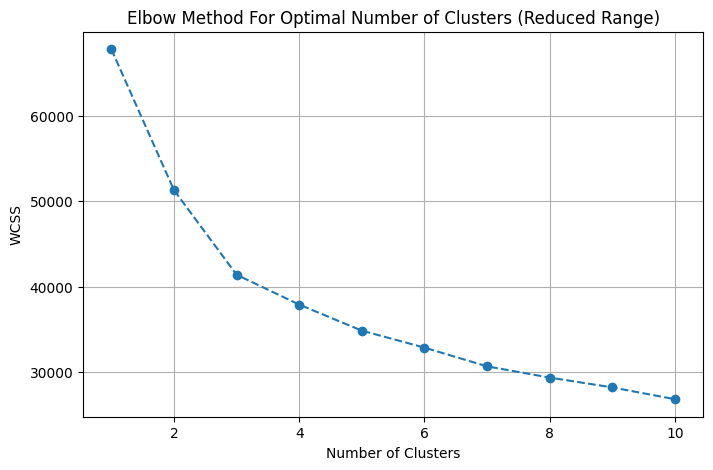

In [40]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [41]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
df = df.iloc[:,:-18]

In [43]:
df['furnishing_type'] = cluster_assignments

In [44]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2093,[],0
973,NaN,0
1885,NaN,0
3289,"['5 Wardrobe', '3 Fan', '5 Geyser', '3 Light',...",0
2699,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '7 Li...",2


In [45]:
df[['society','features']].sample(5)

,society,features
2826,godrej,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
1232,tulip orange,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'S..."
2331,dlf city plots,['Visitor Parking']
302,raheja maheshwara,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
994,vipul world floors,"['Lift(s)', 'Centrally Air Conditioned', 'High..."


In [46]:
df['features'].isnull().sum()

622

In [47]:
df.drop(columns='features', inplace=True)

In [48]:
df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,450.0,6666.0,Carpet area: 450 (41.81 sq.m.),2,1,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99...",12,North,Undefined,NaN,"2bhk affordable, ready to shift in sec 99a lax...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...","['Environment4 out of 5', 'Lifestyle3 out of 5...",O66187314,NaN,NaN,450.0,0,0,0,0,0,0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,1617.0,8100.0,Super Built up area 1617(150.22 sq.m.),2,2,3+,study room,"Sector 88A Gurgaon, Gurgaon, Haryana",3,North-West,Relatively New,"['JMS Crosswalk', ""Saint Paul's School"", 'Indu...",This lovely 2 bhk apartment/flat in sector 88a...,NaN,NaN,S69145532,1617.0,NaN,NaN,1,0,0,0,0,0
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 54,independent,3.75,160.0,234375.0,Plot area 160(14.86 sq.m.),4,4,3,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",3,East,Moderately Old,"['Sector 53-54 metro station', 'Sector 54 chow...",East facing old house ready to move in f block...,"['6 Fan', '1 Exhaust Fan', '3 Geyser', '7 Ligh...","['Environment4 out of 5', 'Safety4 out of 5', ...",B59842588,NaN,160.0,NaN,0,1,0,0,0,2
3,3 BHK Flat in Sector 37D Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37d,bptp terra,1.49,1838.0,8105.0,Super Built up area 1832(170.2 sq.m.)Carpet ar...,3,3,3,others,"Sector 37D Gurgaon, Gurgaon, Haryana",20,North-West,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...",Located in the popular residential address of ...,"['1 Wardrobe', '1 Chimney', '1 Modular Kitchen...","['Green Area4.5 out of 5', 'Construction4.5 ou...",H70022084,1832.0,NaN,1580.0,0,0,0,0,1,0
4,4 BHK Flat in Sector 83 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 83,vatika gurgaon,1.42,1600.0,8875.0,Super Built up area 2390(222.04 sq.m.)Built Up...,4,4,3,"study room,servant room","Block A, Sector 83 Gurgaon, Gurgaon, Haryana",7,South-West,Relatively New,"['Huda Metro Station (Gurugram)', 'Sapphire 83...",This is a 4 bhk row flat the flat occupies a s...,NaN,"['Green Area5 out of 5', 'Construction4.5 out ...",V65295042,2390.0,2000.0,1600.0,1,1,0,0,0,0


In [49]:
df.shape

(3765, 31)

In [50]:
df.to_csv('/content/gdrive/MyDrive/Project - Real Estate/feature-engineering.csv',index=False)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_name        3765 non-null   object 
 1   property_type        3765 non-null   object 
 2   link                 3765 non-null   object 
 3   sector               3765 non-null   object 
 4   society              3765 non-null   object 
 5   price                3765 non-null   float64
 6   area                 3765 non-null   float64
 7   price_per_sqft       3765 non-null   float64
 8   areaWithType         3765 non-null   object 
 9   bedRoom              3765 non-null   int64  
 10  bathroom             3765 non-null   int64  
 11  balcony              3765 non-null   object 
 12  additionalRoom       3765 non-null   object 
 13  address              3756 non-null   object 
 14  floorNum             3765 non-null   int64  
 15  facing               2679 non-null   o

In [52]:
df.isna().sum()

property_name             0
property_type             0
link                      0
sector                    0
society                   0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   9
floorNum                  0
facing                 1086
agePossession             0
nearbyLocations         173
description               0
furnishDetails          974
rating                  337
property_id               0
super_built_up_area    1851
built_up_area          2068
carpet_area            1826
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
dtype: int64